> 
# Project: tmdb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I choose to analyze is tmdb-movie dataset. After exploring the data set, I have some questions in mind. First, What's the trend among movies having high popularity. Second, which one is more likely to have higher popularity, comedy or action? To build my report. I need some dependent variables and independent variables. So, I choose popularity as my dependent variables. Genres, revenue, runtime, budget, revenue_adj, vote_average are independent variables which I assume they may affect the popularity.



#Cell below are all packages that I plan to use for my analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I load in my predownloaded tmdb-movies dataset and inspected it. I take look the first 5 rows of data to understand its structure, checked how many rows and columns in total and the name of each column. Later, I looked at the summary statistics of the entire dataframe. I pose some questions. My first question is what's the trend among the movies with high popularity and how they differ from the movie with low popularity. My second queston is that which genre is more likely to have high popularity, action or comedy?

To justify my questons, variable 'popularity' would be the dependent variable and variables such as'budget', 'revenue', 'runtime', 'genres', 'vote average', and 'revenue-adj' would be used as my independent variables. After having the dependent and independent variables for my analysis, I started checking the missing values. I found variables 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies' having some missing values but majority of them are not in my analysis. I only need to consider the missing values of 'genres' as all other columns not related to my analysis would be dropped. I started inspecting the rows having null values in column "genres'. I made the histogram to compare to the histgram of original dataframe and found the distrubution of the histgram for null values in genres has no big difference with the histgram of original dataframe plus some columns are marked as 0 which is not useful for my research. I decide to drop all those rows. 


### General Properties

In [2]:
df=pd.read_csv('tmdb-movies (1).csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#Checking rows and columns in total

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#dropping all columns not in my analysis

In [6]:
df.drop(['id', 'imdb_id','original_title','cast', 'homepage', 'director', 'tagline', 'keywords','release_date', 'vote_count', 'overview', 'production_companies','release_date','budget_adj'], axis=1, inplace=True)

In [7]:
df.head()

,popularity,budget,revenue,runtime,genres,vote_average,release_year,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,6.3,2015,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,7.3,2015,1.385749e+09


#checking the missing values again for the columns I need; found missing values in column 'genres'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   runtime       10866 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_average  10866 non-null  float64
 6   release_year  10866 non-null  int64  
 7   revenue_adj   10866 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 679.2+ KB


#checking all rows having genres as null value

In [9]:
df[df.genres.isnull()]

,popularity,budget,revenue,runtime,genres,vote_average,release_year,revenue_adj
424,0.244648,0,0,100,NaN,6.1,2015,0.0
620,0.129696,0,0,90,NaN,5.0,2015,0.0
997,0.330431,0,0,44,NaN,6.8,2014,0.0
1712,0.302095,0,0,88,NaN,7.4,2009,0.0
1897,0.020701,0,0,76,NaN,7.0,2009,0.0
2370,0.081892,0,0,0,NaN,5.8,2010,0.0
2376,0.068411,0,0,62,NaN,7.7,2010,0.0
2853,0.130018,0,0,110,NaN,7.2,2001,0.0
3279,0.145331,0,0,96,NaN,6.1,2008,0.0
4547,0.520520,0,0,220,NaN,8.3,2012,0.0


#comparing the histgram of the entire dataset with the histgram of rows having null value; decide to drop all those rows 

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

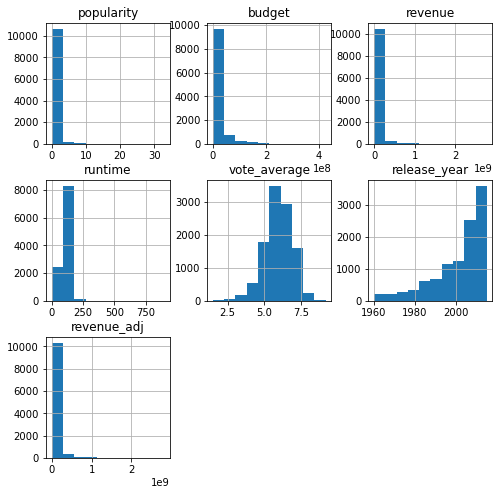

In [10]:
df.hist(figsize=(8,8))

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

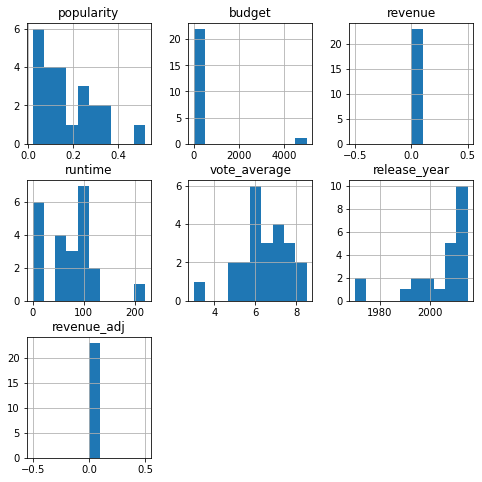

In [11]:
df[df.genres.isnull()].hist(figsize=(8,8))

In [12]:
df.dropna(inplace=True)

#Checked df.info() again see if missing vlaue issue solved; issue solved

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10843 non-null  float64
 1   budget        10843 non-null  int64  
 2   revenue       10843 non-null  int64  
 3   runtime       10843 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_average  10843 non-null  float64
 6   release_year  10843 non-null  int64  
 7   revenue_adj   10843 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 762.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis


###  What's the trend of movies with high popularity? 

#find the median of popularity

In [14]:
df['popularity'].describe()

count    10843.000000
mean         0.647456
std          1.000986
min          0.000065
25%          0.208253
50%          0.384555
75%          0.715349
max         32.985763
Name: popularity, dtype: float64

#dividing the popularity into two groups (high and low) by using the criteria >=median(high), <median(low) 

In [15]:
high_popularity=df.query('popularity >= 0.384555')

In [16]:
print(high_popularity)

       popularity     budget     revenue  runtime  \
0       32.985763  150000000  1513528810      124   
1       28.419936  150000000   378436354      120   
2       13.112507  110000000   295238201      119   
3       11.173104  200000000  2068178225      136   
4        9.335014  190000000  1506249360      137   
...           ...        ...         ...      ...   
10827    0.410366    1377800           0      105   
10828    0.402730    3000000    13000000      128   
10829    0.395668    4653000     6000000      120   
10831    0.529721          0           0      125   
10833    0.737730          0           0      123   

                                              genres  vote_average  \
0          Action|Adventure|Science Fiction|Thriller           6.5   
1          Action|Adventure|Science Fiction|Thriller           7.1   
2                 Adventure|Science Fiction|Thriller           6.3   
3           Action|Adventure|Science Fiction|Fantasy           7.5   
4            

In [17]:
low_popularity=df.query('popularity < 0.384555')

In [18]:
print(low_popularity)

       popularity  budget  revenue  runtime                          genres  \
298      0.370258       0        0       95           Crime|Horror|Thriller   
305      0.250209       0        0       44       Family|TV Movie|Animation   
314      0.383406       0    49970      109  Horror|Romance|Science Fiction   
315      0.383183       0        0       92                        Thriller   
316      0.382997       0        0       84                          Horror   
...           ...     ...      ...      ...                             ...   
10861    0.080598       0        0       95                     Documentary   
10862    0.065543       0        0      176          Action|Adventure|Drama   
10863    0.065141       0        0       94                  Mystery|Comedy   
10864    0.064317       0        0       80                   Action|Comedy   
10865    0.035919   19000        0       74                          Horror   

       vote_average  release_year   revenue_adj  
2

#Using the histgram to see the distribution of revenue in movies with high popularity and low popularity 

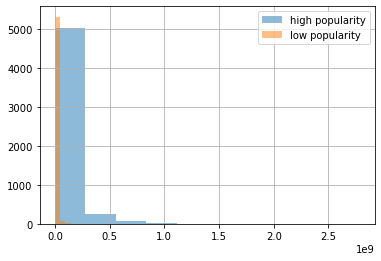

In [19]:
high_popularity['revenue'].hist(alpha=0.5, label= 'high popularity')
low_popularity['revenue'].hist(alpha=0.5,label='low popularity')
plt.legend()


#It seems clearly that movies making high revenue more likely to have high popularity, and the movies making low reveunue are more likely to have low popularity

#If buget is correlated with popularity? Use the histgram but this time change'revenue'to 'budget' when plotting

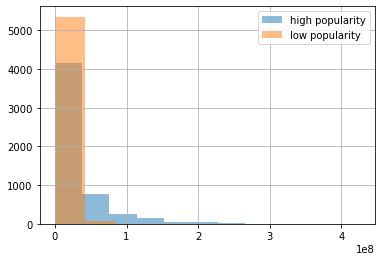

In [20]:
high_popularity['budget'].hist(alpha=0.5, label= 'high popularity')
low_popularity['budget'].hist(alpha=0.5,label='low popularity')
plt.legend()

#from the graph, we cannot see any relationship between the budget and popularity as the budget for movies with low popularity exceed the movies with high popularity. 

#using scatterplot to see if runtime is correlated with popularity

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

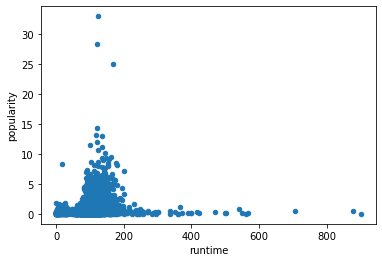

In [21]:
df.plot(x="runtime", y="popularity", kind='scatter')

#from the scatterplot above, there is no correlation between runtime and popularity as in the range between 0 and 200 min, the popularity varies a lot. 

#using scatter plot to see the relationship between vote_average and popularity

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

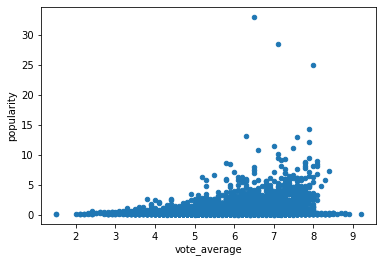

In [22]:
df.plot(x="vote_average", y="popularity", kind='scatter')

#From the graph above, no relationship between vote_average and popularity

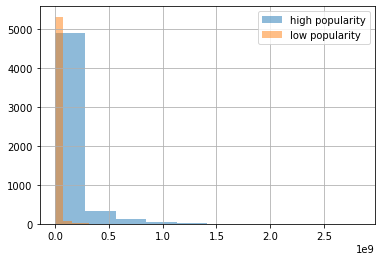

In [23]:
high_popularity['revenue_adj'].hist(alpha=0.5, label= 'high popularity')
low_popularity['revenue_adj'].hist(alpha=0.5,label='low popularity')
plt.legend()


#Graph above is the related movies'revenue ditribution for movies with high popularity group and low popularity. It is clear that associated movies for movies high popularity also making more revenue. 

### Which genre is more likely to receive high popularity, action or comedy? 

#too many kinds of genre and I want to know if action movie have more popularity; I filter all the genre contained the keyword "action" and "comedy" out from high popularity group and put them in two new dataframes called 'action_high' and 'comedy_high' while created a new column in each sheet both named 'type' for later convienence

In [24]:
action_high=high_popularity[high_popularity['genres'].str.contains("Action")]

In [25]:
print(action_high)

       popularity     budget     revenue  runtime  \
0       32.985763  150000000  1513528810      124   
1       28.419936  150000000   378436354      120   
3       11.173104  200000000  2068178225      136   
4        9.335014  190000000  1506249360      137   
6        8.654359  155000000   440603537      125   
...           ...        ...         ...      ...   
10777    0.439210         11          11      145   
10778    0.435312    5000000     7230000      118   
10779    0.411826   12000000    22765081      110   
10823    0.613444          0           0      100   
10829    0.395668    4653000     6000000      120   

                                          genres  vote_average  release_year  \
0      Action|Adventure|Science Fiction|Thriller           6.5          2015   
1      Action|Adventure|Science Fiction|Thriller           7.1          2015   
3       Action|Adventure|Science Fiction|Fantasy           7.5          2015   
4                          Action|Crime|Thr

#creating an array list having 1417 values named 'action'

In [26]:
genre_action=np.repeat("action",1417)

#attch the values in the array list to the values in the column named 'type' in a dataframe named action_high

In [27]:
action_high['type']=genre_action

<ipython-input-27-4eb7de80e92d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_high['type']=genre_action


#filter out all the comedy movie in the high_popularity group and copy them to a new dataframe called comedy_high

In [28]:
comedy_high=high_popularity[high_popularity['genres'].str.contains("Comedy")]

In [29]:
print(comedy_high)

       popularity     budget     revenue  runtime  \
8        7.404165   74000000  1156730962       91   
9        6.326804  175000000   853708609       94   
13       5.984995   88000000   243637091      105   
24       4.648046   28000000   133346506      130   
26       4.564549   68000000   215863606      115   
...           ...        ...         ...      ...   
10810    0.409587      90000           0       87   
10820    1.227582     315000           0       26   
10827    0.410366    1377800           0      105   
10831    0.529721          0           0      125   
10833    0.737730          0           0      123   

                                              genres  vote_average  \
8                  Family|Animation|Adventure|Comedy           6.5   
9                            Comedy|Animation|Family           8.0   
13                     Action|Comedy|Science Fiction           5.8   
24                                      Comedy|Drama           7.3   
26           

#creating an array list called genre_comedy with 1921 values all named 'action'

In [30]:
genre_comedy=np.repeat("comedy",1921)

#attach the values in the array list to values of the new column named type in the dataframe called action_low 

In [31]:
comedy_high['type']=genre_comedy

<ipython-input-31-56f5f6a23c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy_high['type']=genre_comedy


#movie_df is the combination of the two dataframes, action_high, and comedy_high

In [32]:
movie_df=action_high.append(comedy_high)

#Using groupby function to list the numbers of action and comedy movies in high_popularity group/movie_df

In [33]:
movie_df.groupby('type').count()['popularity']

type
action    1417
comedy    1921
Name: popularity, dtype: int64

#Below is the visulization of the numbers of comedy and action movies in the high_popularity group; I seems that more comedy movies in the high_popularity group. 

<AxesSubplot:xlabel='type'>

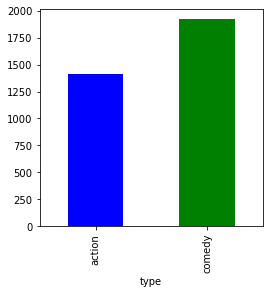

In [34]:
colors=['blue','green']
movie_df.groupby('type').count()['popularity'].plot (kind='bar', figsize=(4,4),color=colors)

#From the graph above, it seems comedy movie has more popularity than action movie.

<a id='conclusions'></a>
## Conclusions

Based on my findings, the variable popularity is correlated with the variables revenue, revenue_adj and genre. There is no relationship between popularity and runtime, vote_average, budget. In other words, the popularity of movie is based on how much revenue the movie going to make, how much revenue of its associated movie going to make, and its genre. However, there is still some limitation of my exploration. Once the sample getter bigger and bigger, the correlation between the variable may change. 


